In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

C:\Users\80214178\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#LEEMOS DATOS BOW
X_tfidf=pd.read_csv("C:\\Users\\80214178\\Documents\\X_tfidf.csv")

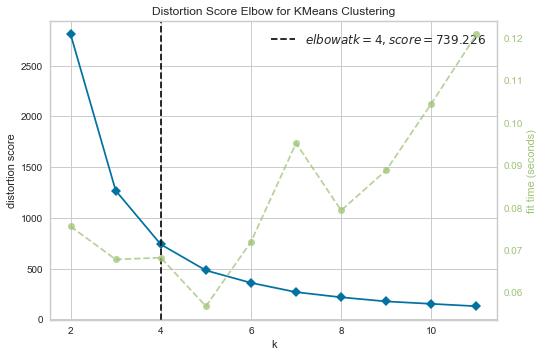

In [3]:
#Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X_tfidf)       
visualizer.show()   


C:\Users\80214178\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\80214178\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\80214178\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


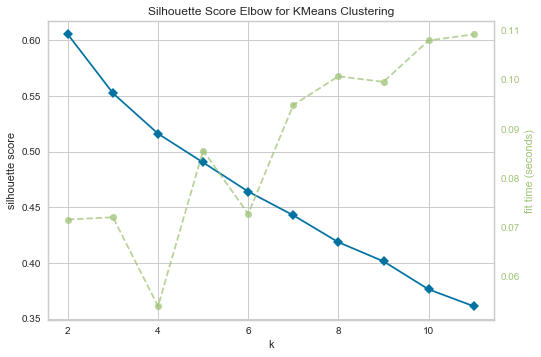

In [4]:
#Silhouette method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X_tfidf)       
visualizer.show()   


In [6]:
#Clusterizamos
kmeans = KMeans(n_clusters =4 )
kmean_indices = kmeans.fit_predict(X_tfidf)

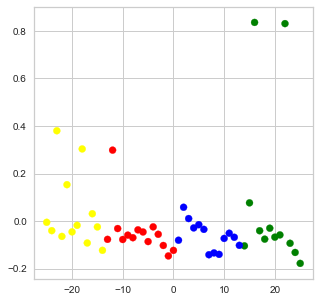

In [7]:
#Visualizamos
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X_tfidf)

colors = ['red', 'green','yellow','blue']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

